In [1]:
# Uncomment the following lines if you are using Windows!
import findspark
findspark.init()
findspark.find()

import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SQLContext

appName = "Data Engineering"
master = "local"
# Create Configuration object for Spark.
conf = pyspark.SparkConf()\
    .set('spark.driver.host','127.0.0.1')\
    .setAppName(appName)\
    .setMaster(master)

# Create Spark Context with the new configurations rather than relying on the default
sc = SparkContext.getOrCreate(conf=conf)

# You need to create SQL Context to conduct some database operations like what we will
sqlContext = SQLContext(sc)

# If you have SQL context, you create the session from the Spark Context
spark = sqlContext.sparkSession.builder.getOrCreate()

file_path_train = r"C:\Users\nickc\OneDrive\Documents\GitHub\hw4-data-engineering-nick1117\NSL-KDD\KDDTrain+.txt"
file_path_test = r"C:\Users\nickc\OneDrive\Documents\GitHub\hw4-data-engineering-nick1117\NSL-KDD\KDDTest+.txt"

train_df = spark.read.csv(file_path_train, header=False, inferSchema=True)
test_df = spark.read.csv(file_path_test, header=False, inferSchema=True)


C:\spark\spark-3.5.2-bin-hadoop3\python\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# **Q1**

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","classes","difficulty_level"]

train_df = train_df.toDF(*col_names)
test_df = test_df.toDF(*col_names)

logged_in_count = train_df.groupBy("protocol_type", "logged_in").count()
logged_in_count.show()


+-------------+---------+-----+
|protocol_type|logged_in|count|
+-------------+---------+-----+
|          tcp|        0|52837|
|         icmp|        0| 8291|
|          udp|        0|14993|
|          tcp|        1|49852|
+-------------+---------+-----+



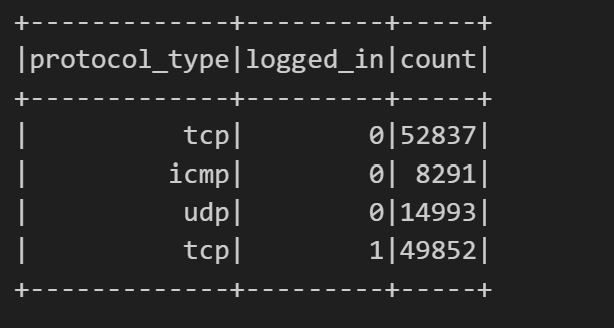

# **Q2**


In [3]:
from pyspark.sql.functions import lit

normal_df = train_df.filter(train_df.classes == "normal")
normal_df = normal_df.withColumn("protocol_type", lit("tcp"))
normal_df.show(5)

+--------+-------------+--------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+----------------+
|duration|protocol_type| service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_dif

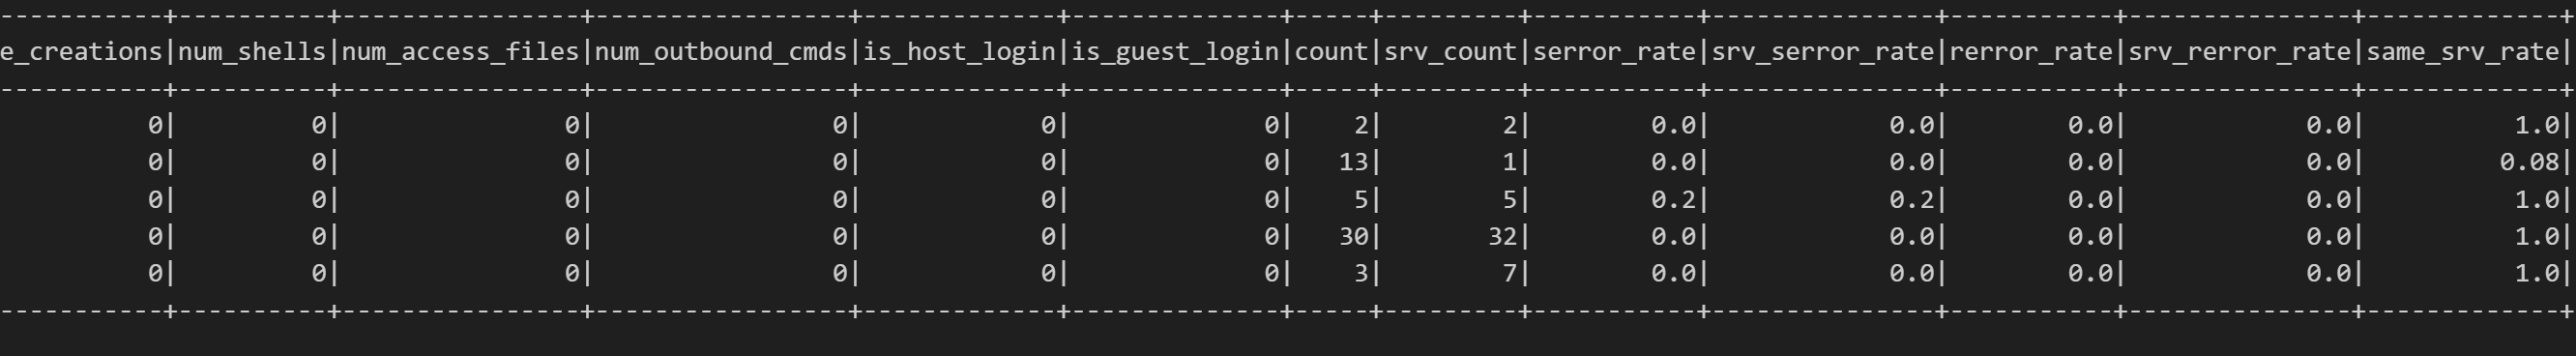

# **Q3**
# code that I ran on the cloud:

In [ ]:
# !pip install wget
# !python -m wget https://www.andrew.cmu.edu/user/mfarag/14813/KDDTest+.txt
# !hadoop fs -put KDDTest+.txt /
# !python -m wget https://www.andrew.cmu.edu/user/mfarag/14813/KDDTrain+.txt
# !hadoop fs -put KDDTrain+.txt /

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","classes","difficulty"]

In [ ]:
spark = SparkSession.builder \
    .master("yarn") \
    .appName("SparkML-yarn") \
    .getOrCreate()
nslkdd_raw = spark.read.csv('/KDDTrain+.txt',header=False).toDF(*col_names)
nslkdd_test_raw = spark.read.csv('/KDDTest+.txt',header=False).toDF(*col_names)

logged_in_count = nslkdd_raw.groupBy("protocol_type", "logged_in").count()
logged_in_count.show()

from pyspark.sql.functions import lit

normal_df = nslkdd_raw.filter(nslkdd_raw.classes == "normal")
normal_df = normal_df.withColumn("protocol_type", lit("tcp"))
normal_df.show(5)

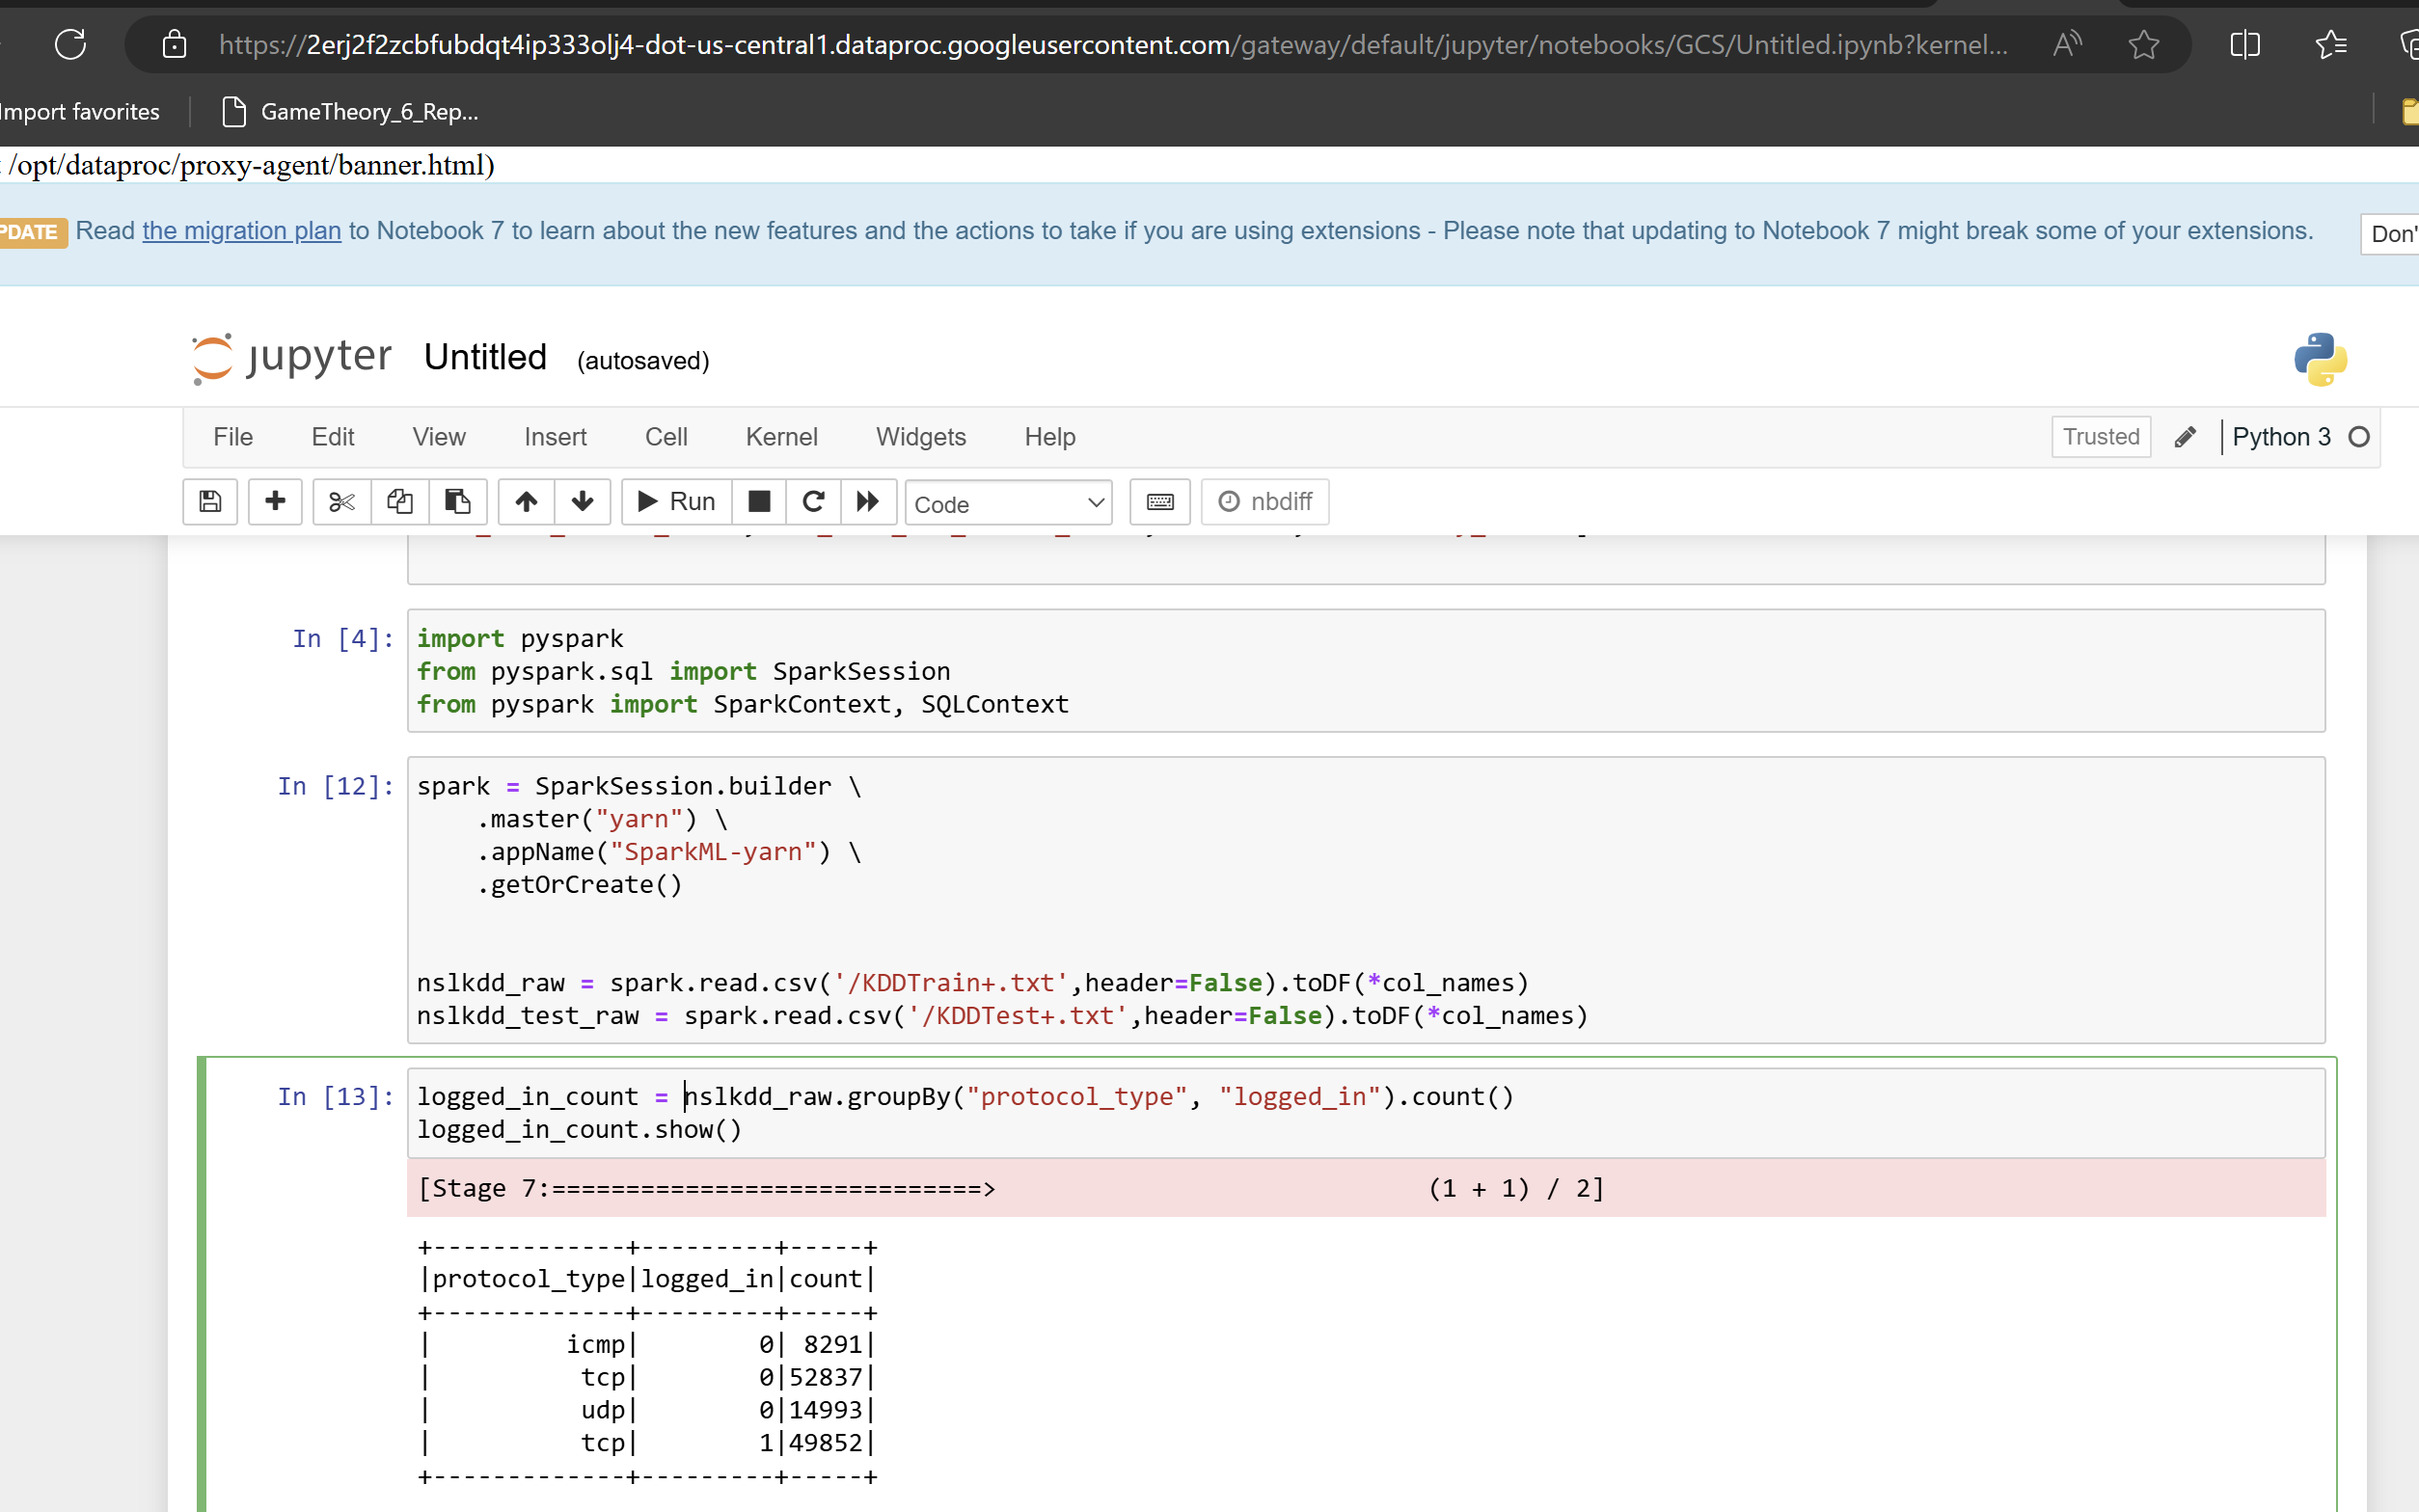

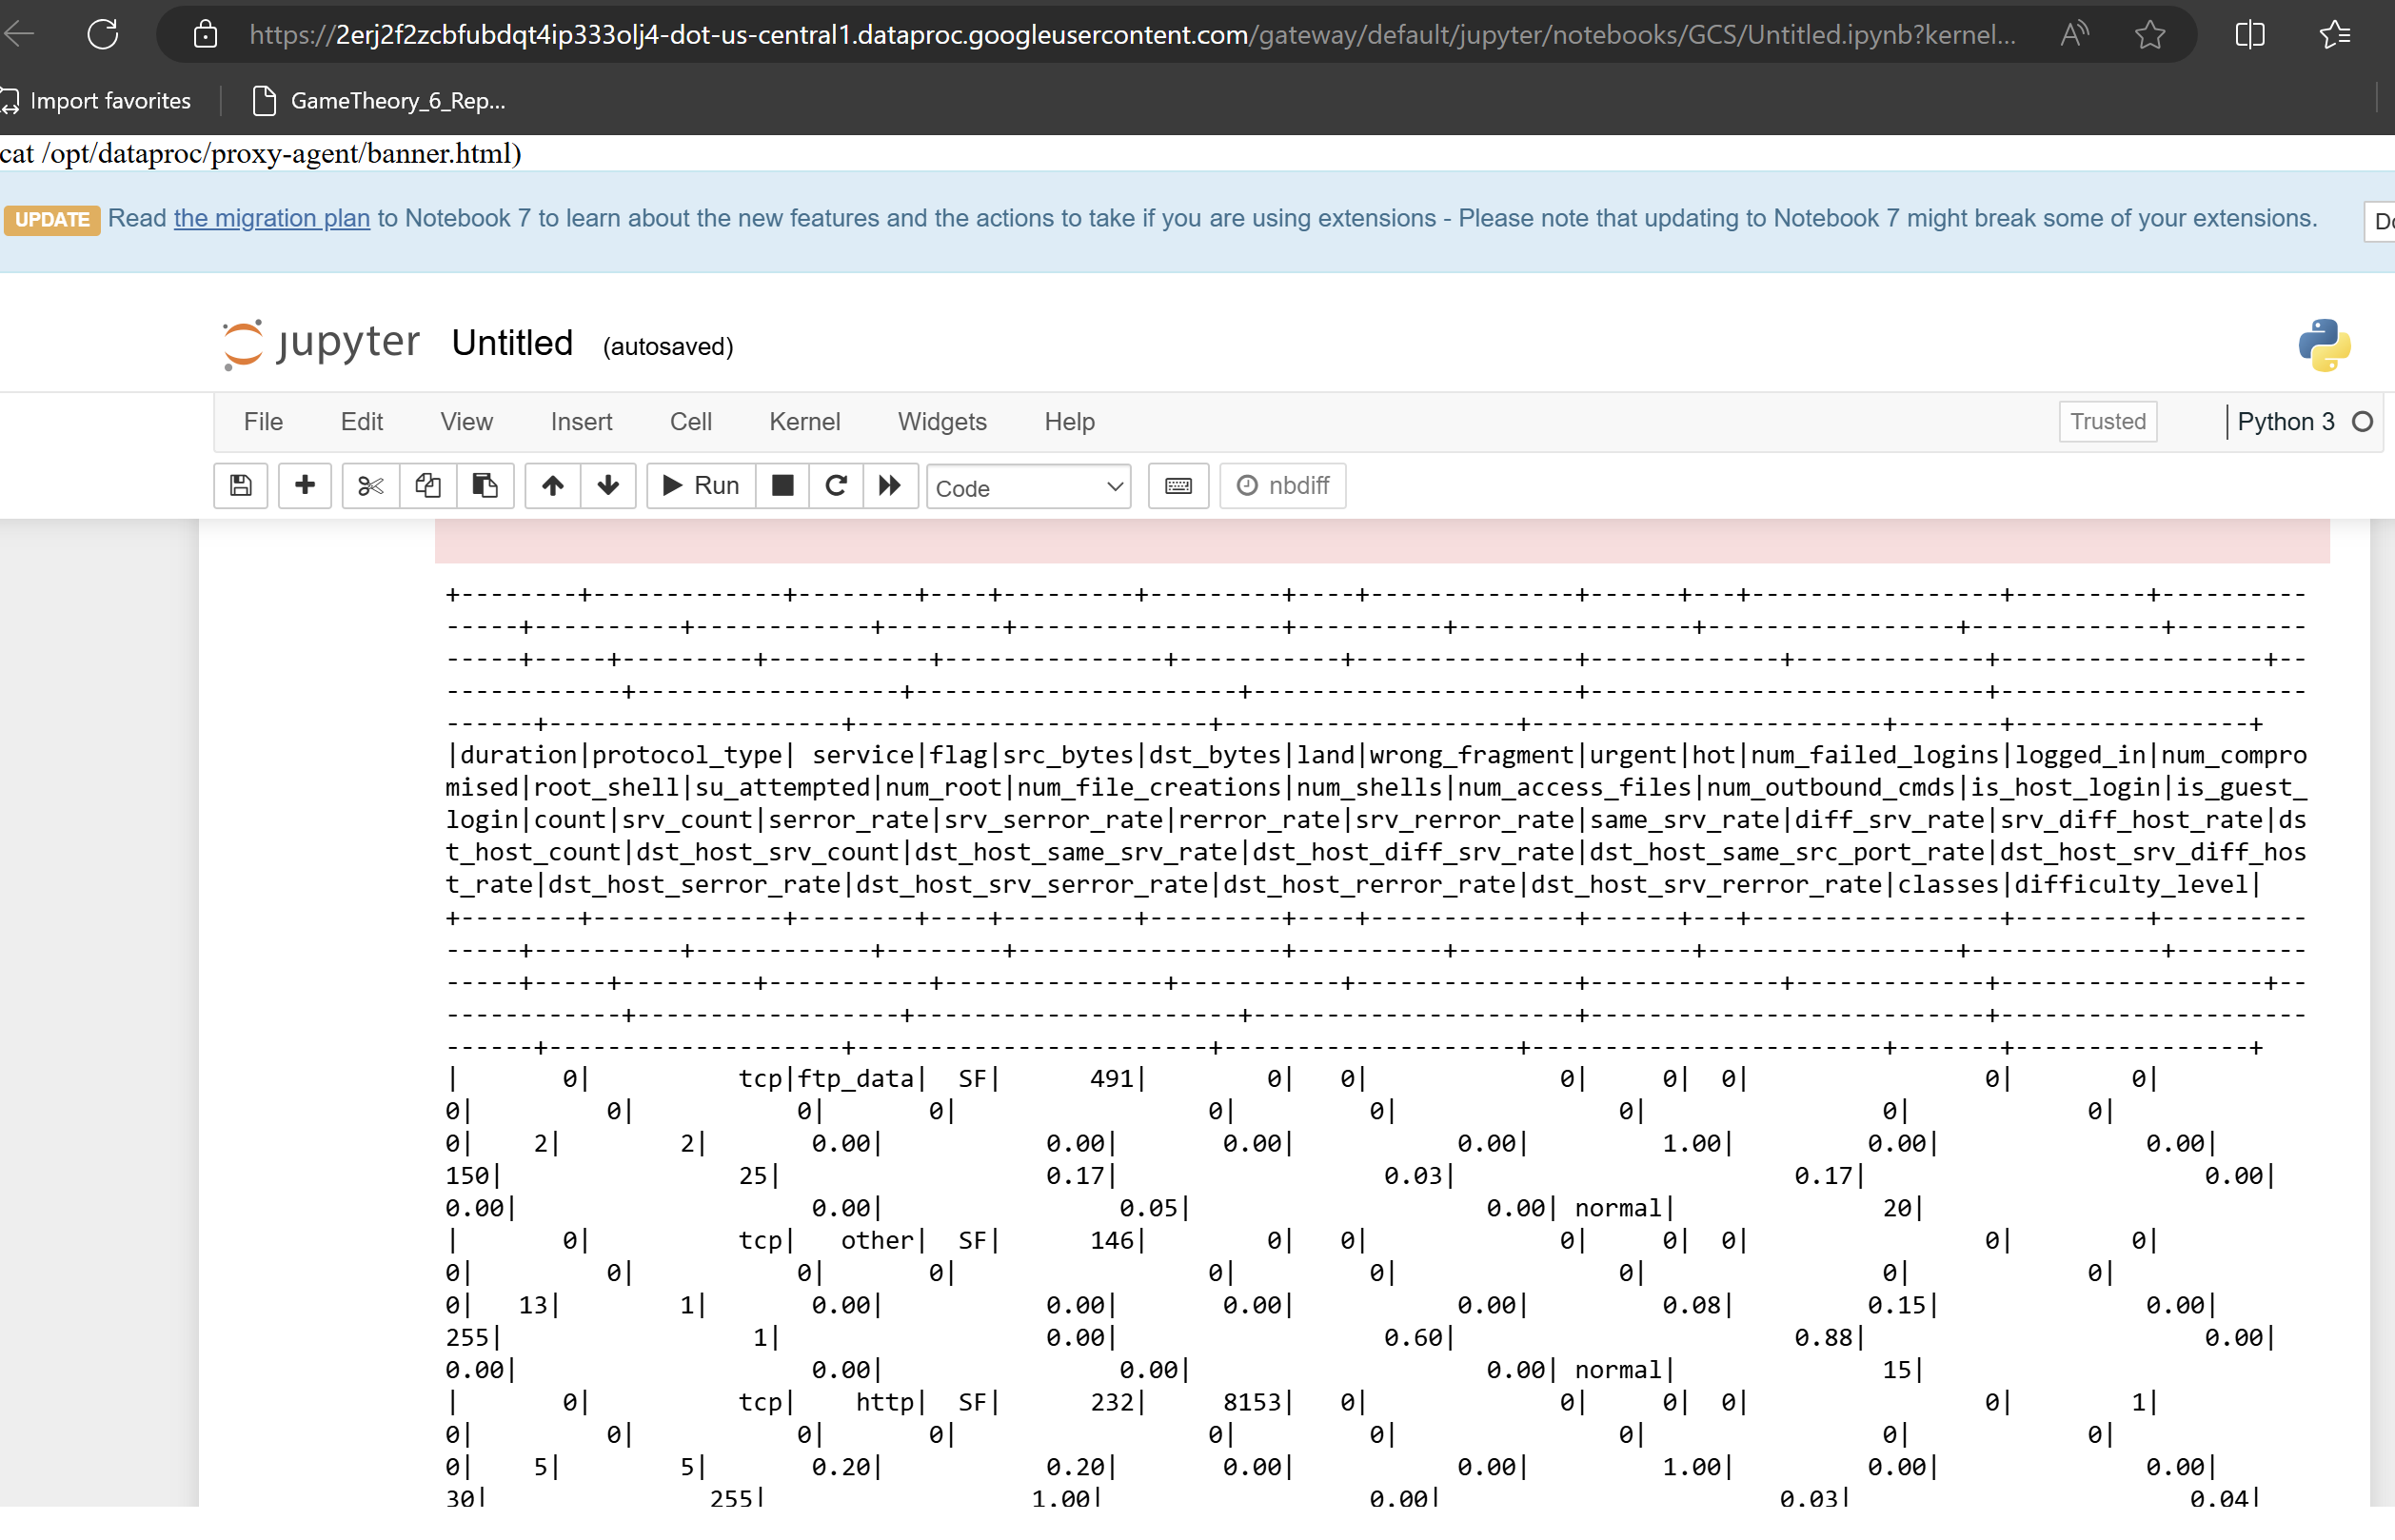

Table formated poorly


# **Q4**

In [4]:
train_df = spark.read.csv(file_path_train, header=False, inferSchema=True).toDF(*col_names)
test_df = spark.read.csv(file_path_test, header=False, inferSchema=True).toDF(*col_names)

train_df = train_df.withColumn("dataset_type", lit("train"))
test_df = test_df.withColumn("dataset_type", lit("test"))

df = train_df.union(test_df)

# jdbc_url = "jdbc:postgresql://localhost:5432/postgres"
# properties = {
#     "user": "postgres",
#     "password": "Nicknac1117+",
#     "driver": "org.postgresql.Driver"
# }

db_properties = {}
db_properties['username'] = "postgres"
db_properties['password'] = "Nicknac1117+"
db_properties['url'] = "jdbc:postgresql://localhost:5432/postgres"
db_properties['table'] = "intrusion"
db_properties['driver'] = "org.postgresql.Driver"

df.write.format("jdbc")\
    .mode("overwrite")\
    .option("url", db_properties['url'])\
    .option("dbtable", db_properties['table'])\
    .option("user", db_properties['username'])\
    .option("password", db_properties['password'])\
    .option("Driver", db_properties['driver'])\
    .save()

df_read = spark.read.format("jdbc")\
    .option("url", db_properties['url'])\
    .option("dbtable", db_properties['table'])\
    .option("user", db_properties['username'])\
    .option("password", db_properties['password'])\
    .option("Driver", db_properties['driver'])\
    .load()

df_read.show(5)
# df.write.jdbc(url=jdbc_url, table="nsl_kdd_schema.nsl_kdd_data", mode="append", properties=properties) #use command
# data = spark.read.jdbc(url=jdbc_url, table="(SELECT * FROM nsl_kdd_schema.nsl_kdd_data LIMIT 5) AS temp", properties=properties)
# data.show()

#lecture 3/2 format 

+--------+-------------+--------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+----------------+------------+
|duration|protocol_type| service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv

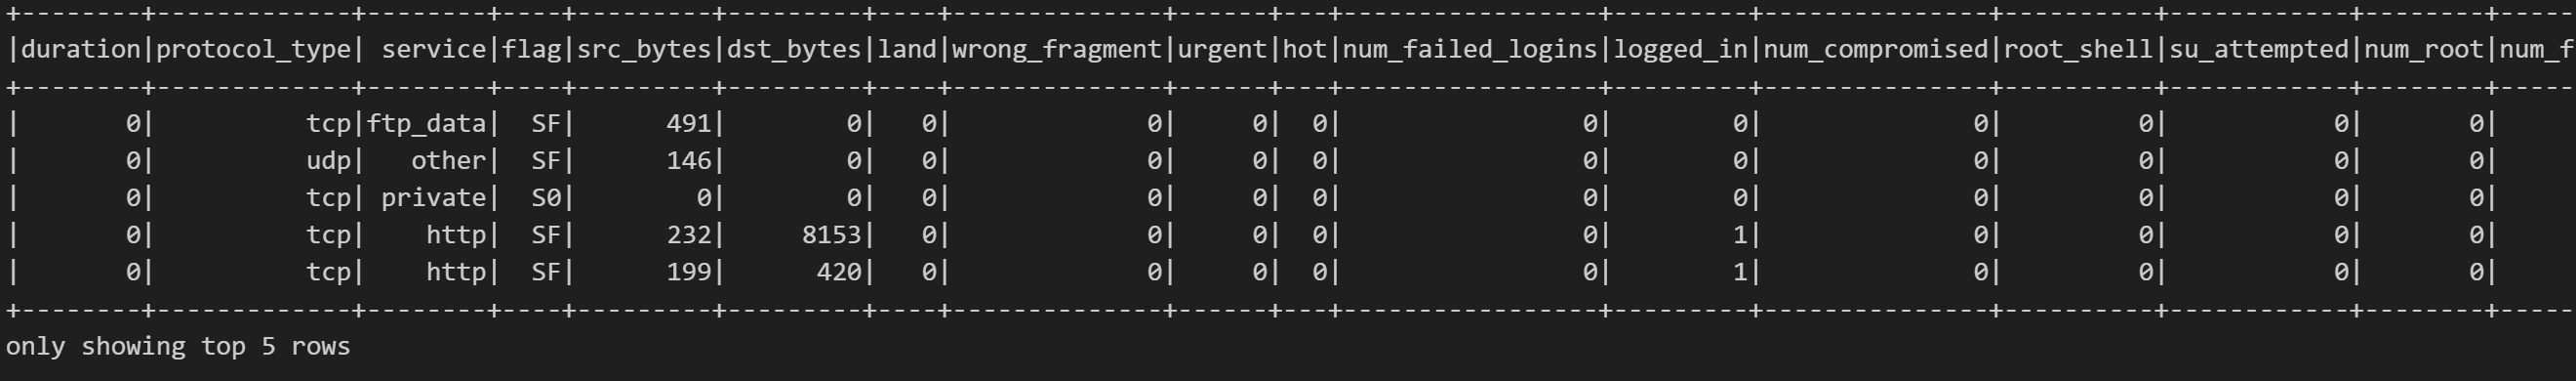
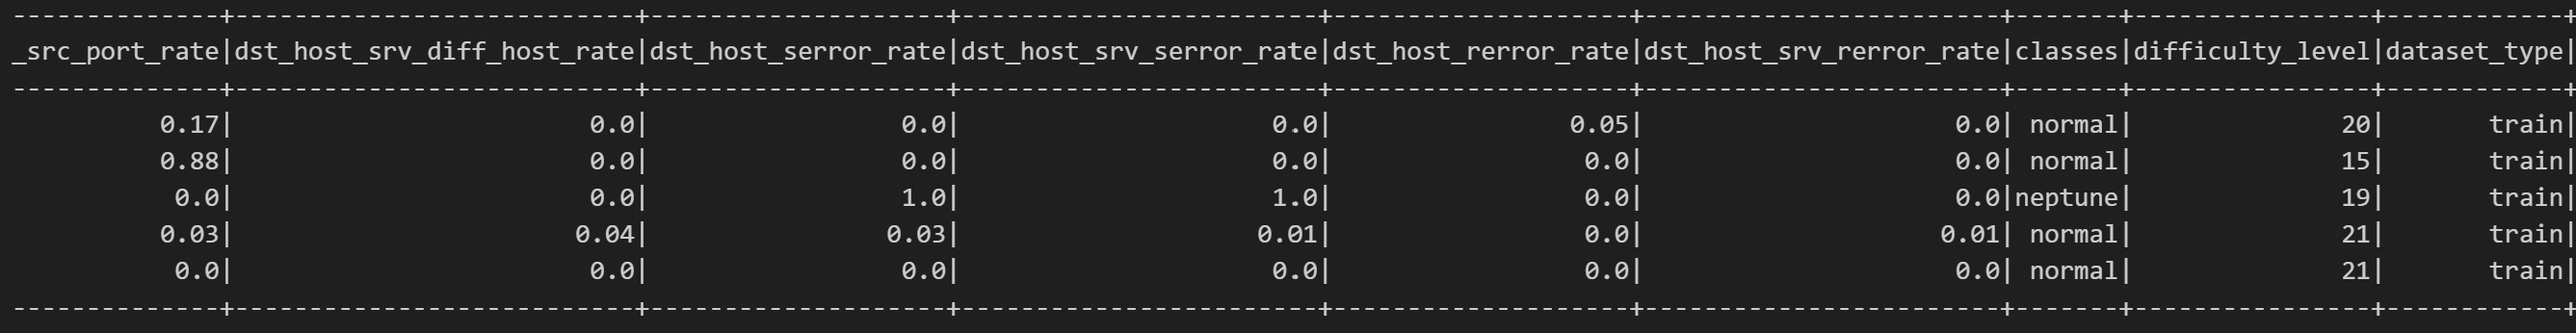

# **Q5**

In [27]:
import pyspark
from pyspark.sql import SparkSession, SQLContext
from pyspark.ml import Pipeline,Transformer

from pyspark.sql.functions import when, col
from pyspark.sql.types import DoubleType

from pyspark.ml.feature import Imputer, StandardScaler, StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np

# col_names = ["gameId", "playId", "quarter", "GameClock", "down", "yardsToGo", 
#              "possessionTeam", "yardlineSide", "yardlineNumber", "offenseFormation", 
#              "personnel_offense", "defendersInTheBox", "numberOfPassRushers", 
#              "personnel_defense", "HomeScoreBeforePlay", "VisitorScoreBeforePlay", 
#              "HomeScoreAfterPlay", "VisitorScoreAfterPlay", "isPenalty", "isSTPlay", 
#              "SpecialTeamsPlayType", "KickReturnYardage", "PassLength", "PassResult", 
#              "YardsAfterCatch", "PlayResult", "playDescription"]

col_names = ["gameId", "playId", "quarter", "down", "yardsToGo", 
             "possessionTeam", "yardlineSide", "yardlineNumber", "offenseFormation", 
              "defendersInTheBox", "numberOfPassRushers", 
              "HomeScoreBeforePlay", "VisitorScoreBeforePlay", 
             "HomeScoreAfterPlay", "VisitorScoreAfterPlay",  
             "SpecialTeamsPlayType", "KickReturnYardage", "PassLength", "PassResult", 
             "YardsAfterCatch", "PlayResult", "playDescription"]

#nominal_cols = ['offenseFormation', 'personnel_offense', 'personnel_defense']
nominal_cols = ['offenseFormation']

#binary_cols = ['isPenalty', 'isSTPlay']
binary_cols = []


continuous_cols = ['quarter', 'down', 'yardsToGo', 'yardlineNumber', 
                   'defendersInTheBox', 'numberOfPassRushers', 
                   'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 
                   'HomeScoreAfterPlay', 'VisitorScoreAfterPlay']

# corelated_cols_to_remove = ["gameId", "playId", "quarter", "GameClock",
#              "possessionTeam", "yardlineSide", 
#              "personnel_offense",
#              "personnel_defense", 
#              "isPenalty", "isSTPlay", 
#              "SpecialTeamsPlayType", "KickReturnYardage",
#              "playDescription"]
corelated_cols_to_remove = ["gameId", "playId", "quarter",
             "possessionTeam", "yardlineSide", 
             "SpecialTeamsPlayType", "KickReturnYardage",
             "playDescription"]

class OutcomeCreater(Transformer): 
    def __init__(self):
        super().__init__()
    
    def _transform(self, dataset):
        output_df = dataset.withColumn('outcome', col('PlayResult').cast(DoubleType()))
        output_df = output_df.drop('PlayResult')
        return output_df

class FeatureTypeCaster(Transformer): 
    def __init__(self):
        super().__init__()
    
    def _transform(self, dataset):
        output_df = dataset
        for col_name in binary_cols + continuous_cols:
            output_df = output_df.withColumn(col_name, col(col_name).cast(DoubleType()))
        return output_df

class ColumnDropper(Transformer): 
    def __init__(self, columns_to_drop=None):
        super().__init__()
        self.columns_to_drop = columns_to_drop
    
    def _transform(self, dataset):
        output_df = dataset
        for col_name in self.columns_to_drop:
            output_df = output_df.drop(col_name)
        return output_df

def get_preprocess_pipeline():
    stage_typecaster = FeatureTypeCaster()

    nominal_id_cols = [x+"_index" for x in nominal_cols]
    nominal_onehot_cols = [x+"_encoded" for x in nominal_cols]
    stage_nominal_indexer = StringIndexer(inputCols=nominal_cols, outputCols=nominal_id_cols)

    stage_nominal_onehot_encoder = OneHotEncoder(inputCols=nominal_id_cols, outputCols=nominal_onehot_cols)

    feature_cols = continuous_cols + binary_cols + nominal_onehot_cols
    #stage_vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="vectorized_features")

    #print(feature_cols)
    for col_name in corelated_cols_to_remove:
        if col_name in feature_cols:
            feature_cols.remove(col_name)
    #print(feature_cols)
    stage_vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="vectorized_features")

    stage_scaler = StandardScaler(inputCol='vectorized_features', outputCol='features')

    stage_outcome = OutcomeCreater()

    stage_column_dropper = ColumnDropper(columns_to_drop=nominal_cols + nominal_id_cols + nominal_onehot_cols + binary_cols + continuous_cols + ['vectorized_features'])

    pipeline = Pipeline(stages=[stage_typecaster, stage_nominal_indexer, stage_nominal_onehot_encoder, stage_vector_assembler, stage_scaler, stage_outcome, stage_column_dropper])
    
    return pipeline


spark = SparkSession.builder \
    .master("local[*]") \
    .appName("NFL-Pro-Bowl-Feature-Engineering") \
    .getOrCreate()

plays_path = r"C:\Users\nickc\OneDrive\Documents\GitHub\hw4-data-engineering-nick1117\plays.csv"
df_raw = spark.read.csv(plays_path, header=True, inferSchema=True)

# df_raw = df_raw.withColumnRenamed('personnel.defense', 'personnel_defense')
# df_raw = df_raw.withColumnRenamed('personnel.offense', 'personnel_offense')

df_raw = df_raw.drop('isPenalty', 'isSTPlay', 'personnel.defense', 'personnel.offense', 'GameClock')

cols_to_change = ['yardlineNumber','defendersInTheBox','numberOfPassRushers','KickReturnYardage','PassLength','YardsAfterCatch']
for column in cols_to_change:
    df_raw = df_raw.withColumn(column, col(column).cast(IntegerType()))


total_rows = df_raw.count()

for col_name, col_type in df_raw.dtypes:
    if col_name in df_raw.columns:
        if col_type == 'string':
            df_raw = df_raw.fillna({col_name: "Unknown"})
        else:
            df_raw = df_raw.fillna({col_name: 0})


#df_raw.printSchema()

df_raw.show(5)

preprocess_pipeline = get_preprocess_pipeline()

preprocess_pipeline_model = preprocess_pipeline.fit(df_raw)
nfl_df = preprocess_pipeline_model.transform(df_raw)

nfl_df.select("features").show(5, truncate=False, vertical=True)

#get rid of personnel offense, 
#one hot encode postion


+----------+------+-------+----+---------+--------------+------------+--------------+----------------+-----------------+-------------------+-------------------+----------------------+------------------+---------------------+--------------------+-----------------+----------+----------+---------------+----------+--------------------+
|    gameId|playId|quarter|down|yardsToGo|possessionTeam|yardlineSide|yardlineNumber|offenseFormation|defendersInTheBox|numberOfPassRushers|HomeScoreBeforePlay|VisitorScoreBeforePlay|HomeScoreAfterPlay|VisitorScoreAfterPlay|SpecialTeamsPlayType|KickReturnYardage|PassLength|PassResult|YardsAfterCatch|PlayResult|     playDescription|
+----------+------+-------+----+---------+--------------+------------+--------------+----------------+-----------------+-------------------+-------------------+----------------------+------------------+---------------------+--------------------+-----------------+----------+----------+---------------+----------+--------------------

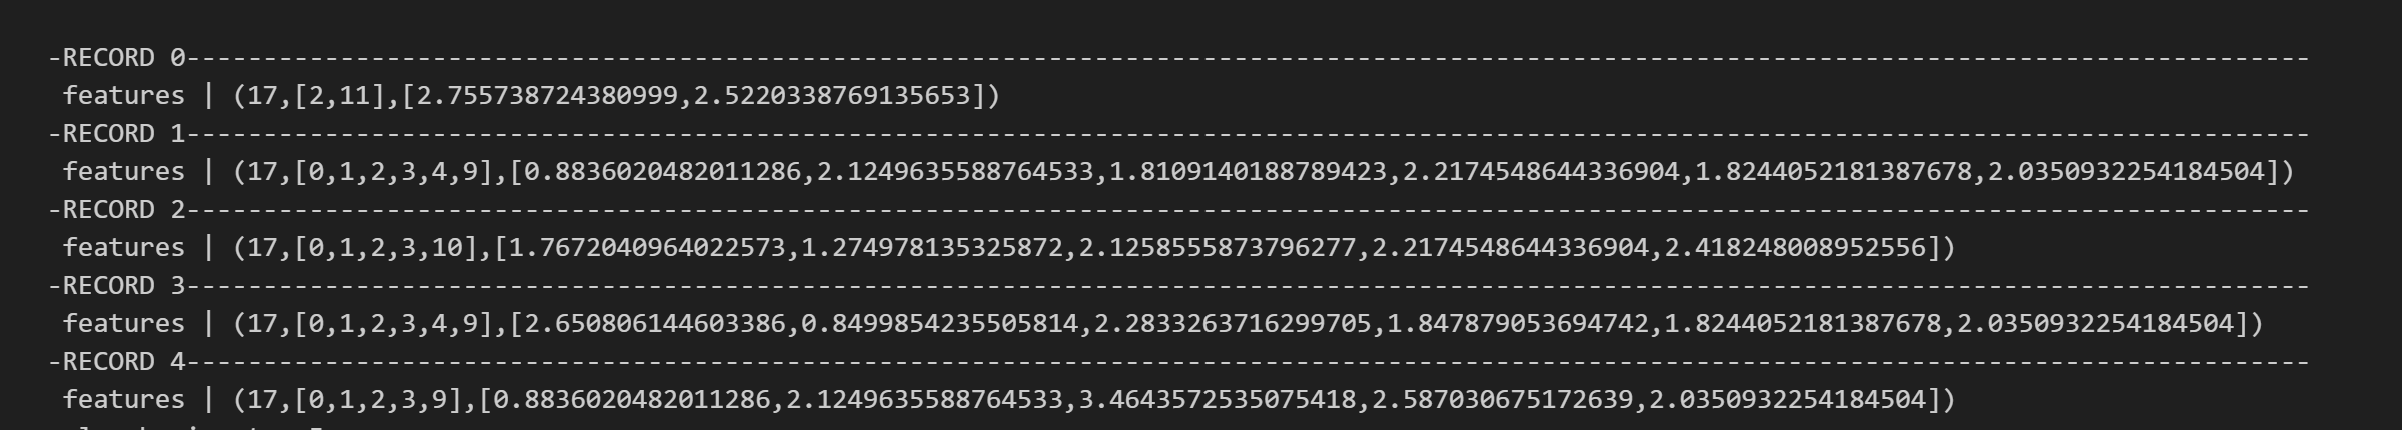